In [16]:
import pandas as pd
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn import preprocessing
from sklearn.cluster import KMeans
from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

df = pd.read_csv('/content/healthy_lifestyle_city_2021.csv')

df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670,7.23,218,788,£31.04


In [17]:
nulsum = df.isna().sum()
nulsum

City                                      0
Rank                                      0
Sunshine hours(City)                      0
Cost of a bottle of water(City)           0
Obesity levels(Country)                   0
Life expectancy(years) (Country)          0
Pollution(Index score) (City)             0
Annual avg. hours worked                  0
Happiness levels(Country)                 0
Outdoor activities(City)                  0
Number of take out places(City)           0
Cost of a monthly gym membership(City)    0
dtype: int64

In [18]:
df['Annual avg. hours worked'].value_counts()

Annual avg. hours worked
-       11
1779     6
1644     2
1386     2
1686     2
1670     2
1712     2
1557     2
1434     1
1965     1
1718     1
1538     1
1505     1
1583     1
1772     1
1967     1
1832     1
1898     1
1540     1
1380     1
1452     1
1501     1
2137     1
Name: count, dtype: int64

In [19]:
import pandas as pd


# Замена символов '-' на NaN
df['Annual avg. hours worked'].replace('-', np.nan, inplace=True)

# Преобразование значений столбца в числовой формат
df['Annual avg. hours worked'] = pd.to_numeric(df['Annual avg. hours worked'])

# Нахождение среднего значения
mean_hours = df['Annual avg. hours worked'].mean()

# Замена пропущенных значений на среднее
df['Annual avg. hours worked'].fillna(mean_hours, inplace=True)

df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.93,1434.000000,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.86,1712.000000,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.33,1501.000000,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.63,1452.000000,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.24,1380.000000,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.08,1540.000000,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,-,1644.000000,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.41,1386.000000,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.19,1686.000000,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.26,1670.000000,7.23,218,788,£31.04


In [20]:
# Замена символов '-' на NaN
df['Pollution(Index score) (City)'].replace('-', np.nan, inplace=True)

# Преобразование значений столбца в числовой формат
df['Pollution(Index score) (City)'] = pd.to_numeric(df['Pollution(Index score) (City)'])

# Нахождение среднего значения
mean_hours = df['Pollution(Index score) (City)'].mean()

# Замена пропущенных значений на среднее
df['Pollution(Index score) (City)'].fillna(mean_hours, inplace=True)

df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858,£1.92,20.40%,81.2,30.930000,1434.000000,7.44,422,1048,£34.90
1,Sydney,2,2636,£1.48,29.00%,82.1,26.860000,1712.000000,7.22,406,1103,£41.66
2,Vienna,3,1884,£1.94,20.10%,81.0,17.330000,1501.000000,7.29,132,1008,£25.74
3,Stockholm,4,1821,£1.72,20.60%,81.8,19.630000,1452.000000,7.35,129,598,£37.31
4,Copenhagen,5,1630,£2.19,19.70%,79.8,21.240000,1380.000000,7.64,154,523,£32.53
5,Helsinki,6,1662,£1.60,22.20%,80.4,13.080000,1540.000000,7.80,113,309,£35.23
6,Fukuoka,7,2769,£0.78,4.30%,83.2,51.122326,1644.000000,5.87,35,539,£55.87
7,Berlin,8,1626,£1.55,22.30%,80.6,39.410000,1386.000000,7.07,254,1729,£26.11
8,Barcelona,9,2591,£1.19,23.80%,82.2,65.190000,1686.000000,6.40,585,2344,£37.80
9,Vancouver,10,1938,£1.08,29.40%,81.7,24.260000,1670.000000,7.23,218,788,£31.04


In [21]:
# Замена символов '-' на NaN
df['Sunshine hours(City)'].replace('-', np.nan, inplace=True)

# Преобразование значений столбца в числовой формат
df['Sunshine hours(City)'] = pd.to_numeric(df['Sunshine hours(City)'])

# Нахождение среднего значения
mean_hours = df['Sunshine hours(City)'].mean()

# Замена пропущенных значений на среднее
df['Sunshine hours(City)'].fillna(mean_hours, inplace=True)

df

,City,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,Amsterdam,1,1858.000000,£1.92,20.40%,81.2,30.930000,1434.000000,7.44,422,1048,£34.90
1,Sydney,2,2636.000000,£1.48,29.00%,82.1,26.860000,1712.000000,7.22,406,1103,£41.66
2,Vienna,3,1884.000000,£1.94,20.10%,81.0,17.330000,1501.000000,7.29,132,1008,£25.74
3,Stockholm,4,1821.000000,£1.72,20.60%,81.8,19.630000,1452.000000,7.35,129,598,£37.31
4,Copenhagen,5,1630.000000,£2.19,19.70%,79.8,21.240000,1380.000000,7.64,154,523,£32.53
5,Helsinki,6,1662.000000,£1.60,22.20%,80.4,13.080000,1540.000000,7.80,113,309,£35.23
6,Fukuoka,7,2769.000000,£0.78,4.30%,83.2,51.122326,1644.000000,5.87,35,539,£55.87
7,Berlin,8,1626.000000,£1.55,22.30%,80.6,39.410000,1386.000000,7.07,254,1729,£26.11
8,Barcelona,9,2591.000000,£1.19,23.80%,82.2,65.190000,1686.000000,6.40,585,2344,£37.80
9,Vancouver,10,1938.000000,£1.08,29.40%,81.7,24.260000,1670.000000,7.23,218,788,£31.04


у нас 44 разные страны и нет ни одной повторяющейся, значит удаляем

In [22]:
0
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].apply(lambda x: x.replace('%', ''))
df['Obesity levels(Country)'] = df['Obesity levels(Country)'].astype(float)
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].apply(lambda x: x.replace('£', ''))
df['Cost of a monthly gym membership(City)'] = df['Cost of a monthly gym membership(City)'].astype(float)

In [23]:
df = df.drop(columns = ['City'])
df

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
0,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90
1,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66
2,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74
3,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31
4,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53
5,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23
6,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87
7,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11
8,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80
9,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04


In [24]:
df.corr()

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City)
Rank,1.000000,0.007937,-0.141420,0.197486,-0.320034,0.419829,0.463708,-0.231970,-0.076972,0.363058,0.272521
Sunshine hours(City),0.007937,1.000000,-0.331239,0.281115,-0.353388,0.383466,0.443596,-0.328979,0.126767,-0.210539,0.029244
Cost of a bottle of water(City),-0.141420,-0.331239,1.000000,0.293047,0.612382,-0.732659,-0.479196,0.813159,-0.260297,-0.089963,0.356461
Obesity levels(Country),0.197486,0.281115,0.293047,1.000000,0.091071,-0.246972,0.193710,0.446399,0.150171,0.016833,-0.070904
Life expectancy(years) (Country),-0.320034,-0.353388,0.612382,0.091071,1.000000,-0.552715,-0.212952,0.724587,-0.044864,0.128163,0.417986
Pollution(Index score) (City),0.419829,0.383466,-0.732659,-0.246972,-0.552715,1.000000,0.395422,-0.762935,0.236837,0.186281,-0.241757
Annual avg. hours worked,0.463708,0.443596,-0.479196,0.193710,-0.212952,0.395422,1.000000,-0.290647,0.078753,-0.033546,0.123009
Happiness levels(Country),-0.231970,-0.328979,0.813159,0.446399,0.724587,-0.762935,-0.290647,1.000000,-0.137612,0.033116,0.297425
Outdoor activities(City),-0.076972,0.126767,-0.260297,0.150171,-0.044864,0.236837,0.078753,-0.137612,1.000000,0.528200,-0.115400
Number of take out places(City),0.363058,-0.210539,-0.089963,0.016833,0.128163,0.186281,-0.033546,0.033116,0.528200,1.000000,0.092610


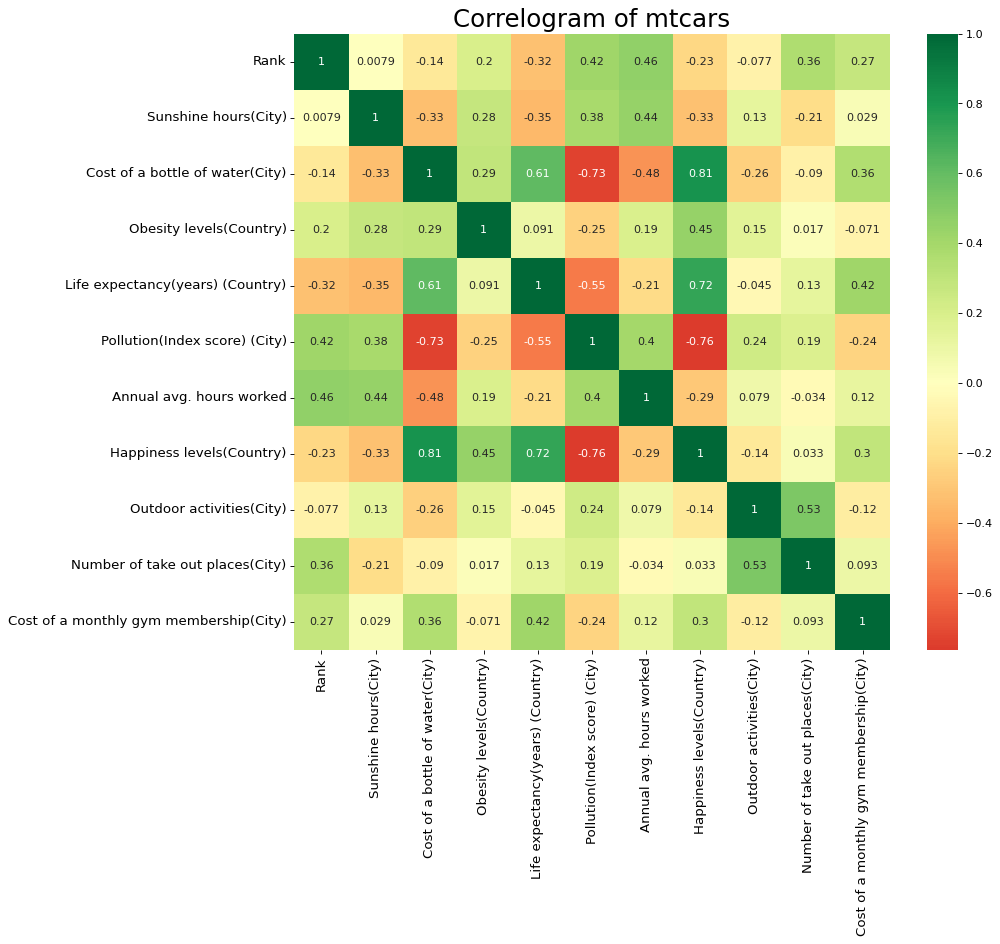

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

plt.figure(figsize=(12,10), dpi= 80)
sns.heatmap(df.corr(), xticklabels=df.corr().columns, yticklabels=df.corr().columns, cmap='RdYlGn', center=0, annot=True)

# Decorations
plt.title('Correlogram of mtcars', fontsize=22)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.show()

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

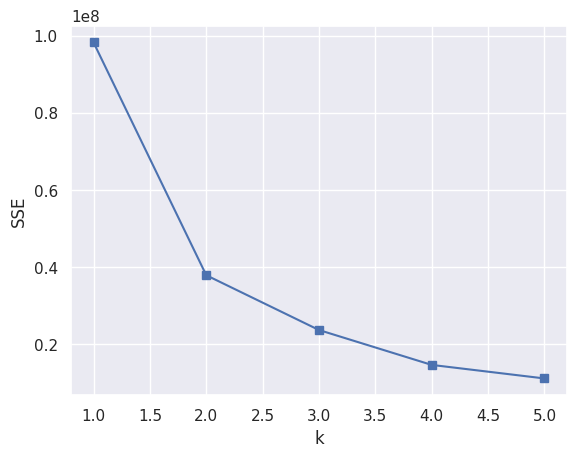

In [32]:

# метод локтя
X = df.loc[:,['Annual avg. hours worked','Happiness levels(Country)']]

SSE = [] # Сумма квадратов ошибок для каждого результата

for k in range(1,6):
    kmeans = KMeans(n_clusters = k) # построить кластер
    kmeans.fit(df)
    SSE.append(kmeans.inertia_)

# Построение графика
plt.plot(range(1,6), SSE, marker='s');
plt.xlabel('k')
plt.ylabel('SSE');
plt.show()

In [28]:
n=3

kmeans = KMeans(n_clusters=3)

kmeans.fit(df)

Y_pred = kmeans.labels_
Y_pred

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


array([2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2, 2, 0, 2, 0, 0, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 1, 0, 2, 1, 2, 0, 2, 0, 0, 2],
      dtype=int32)

In [29]:
df['cluster'] = Y_pred
df

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster
0,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90,2
1,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66,2
2,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74,2
3,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31,2
4,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53,2
5,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23,2
6,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87,2
7,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11,0
8,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80,0
9,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04,2


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 2 The average silhouette_score is : 0.7049787496083262


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 3 The average silhouette_score is : 0.5882004012129721


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 4 The average silhouette_score is : 0.6505186632729437


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 5 The average silhouette_score is : 0.56376469026194


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 6 The average silhouette_score is : 0.4504666294372765
For n_clusters = 7 The average silhouette_score is : 0.39092211029930857


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


For n_clusters = 8 The average silhouette_score is : 0.3314853899648912
For n_clusters = 9 The average silhouette_score is : 0.3349898818697859


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


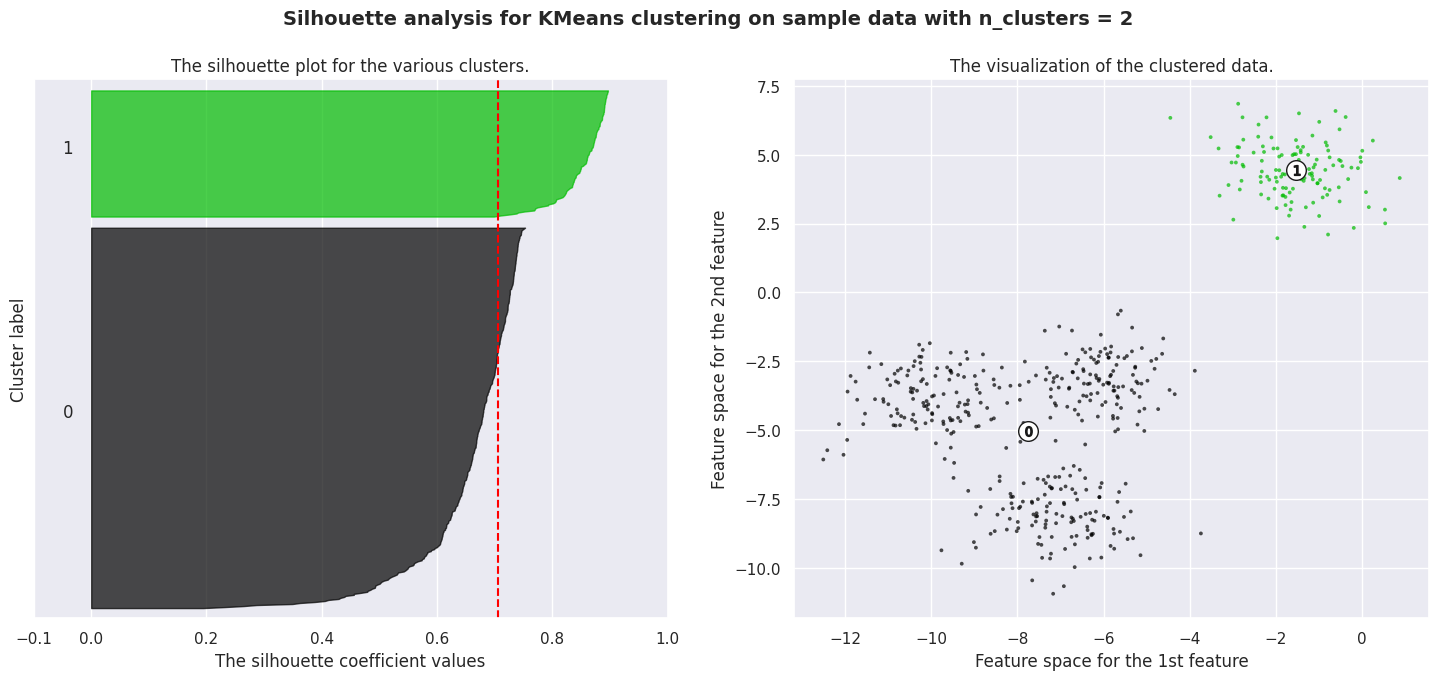

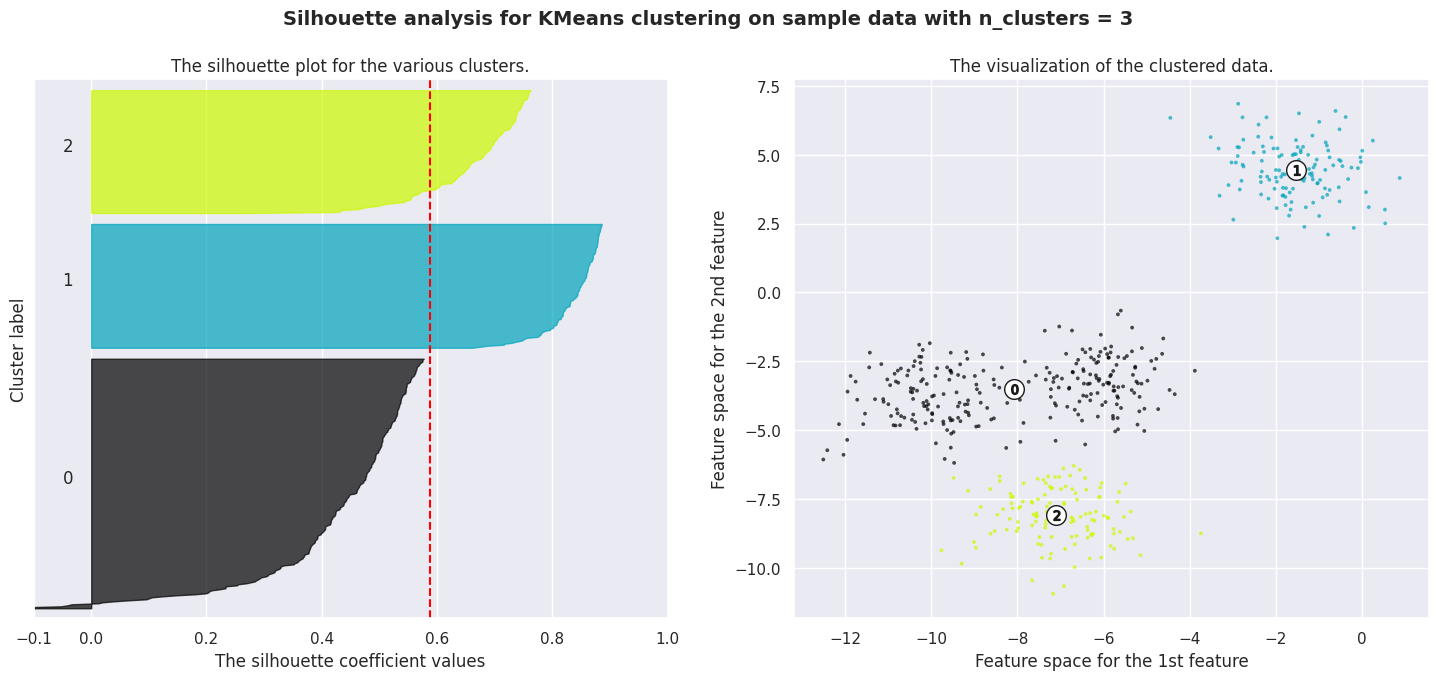

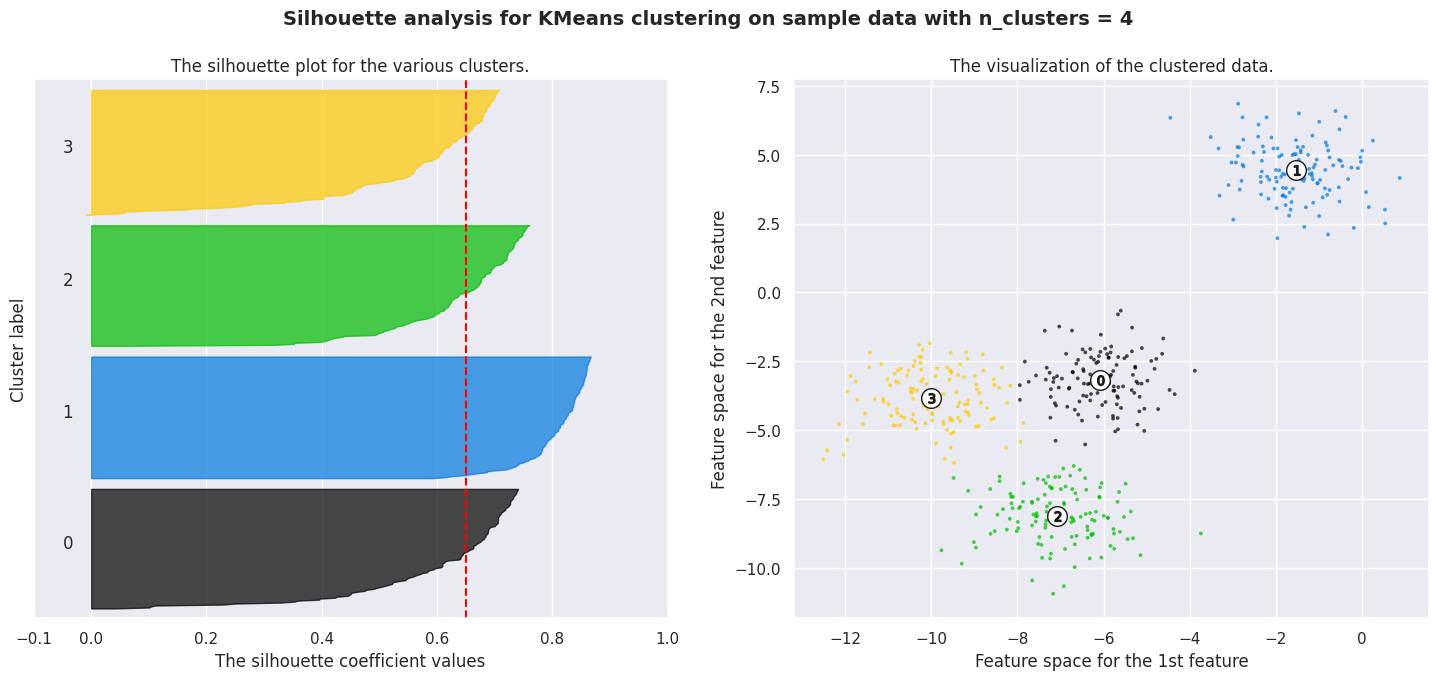

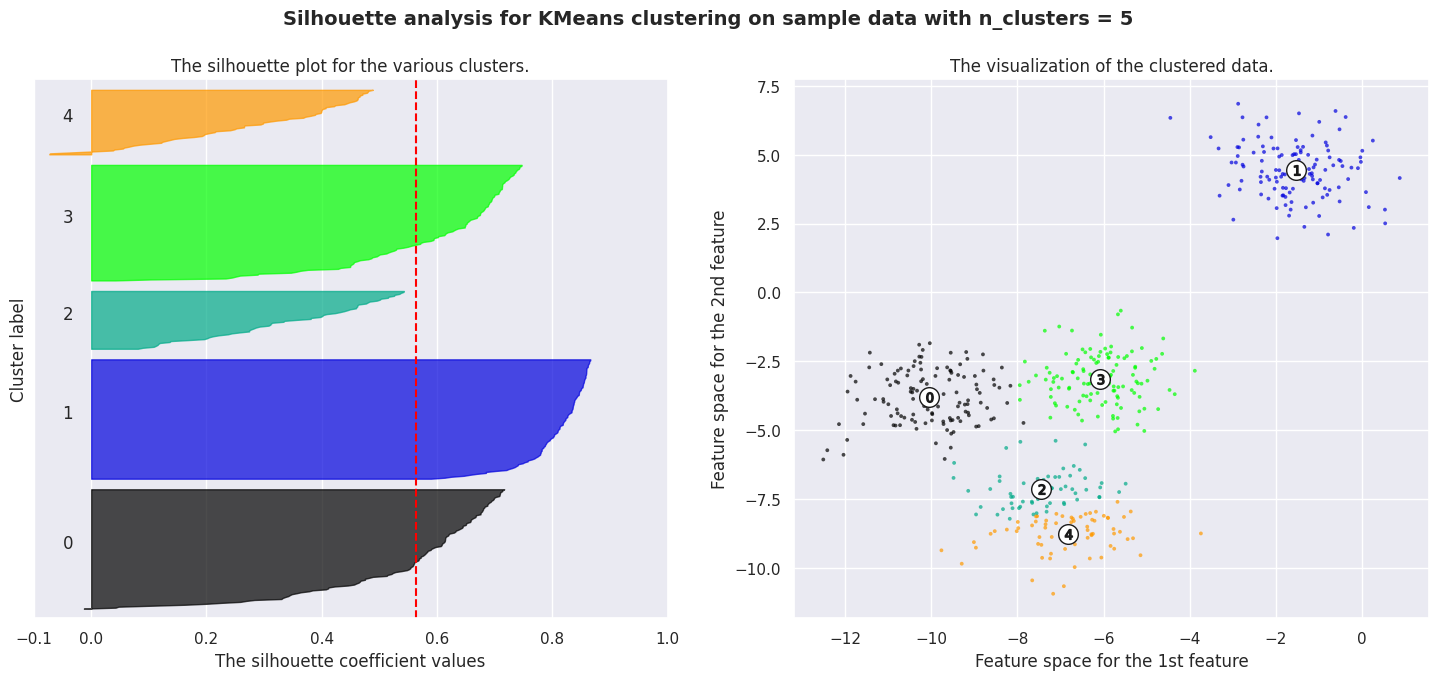

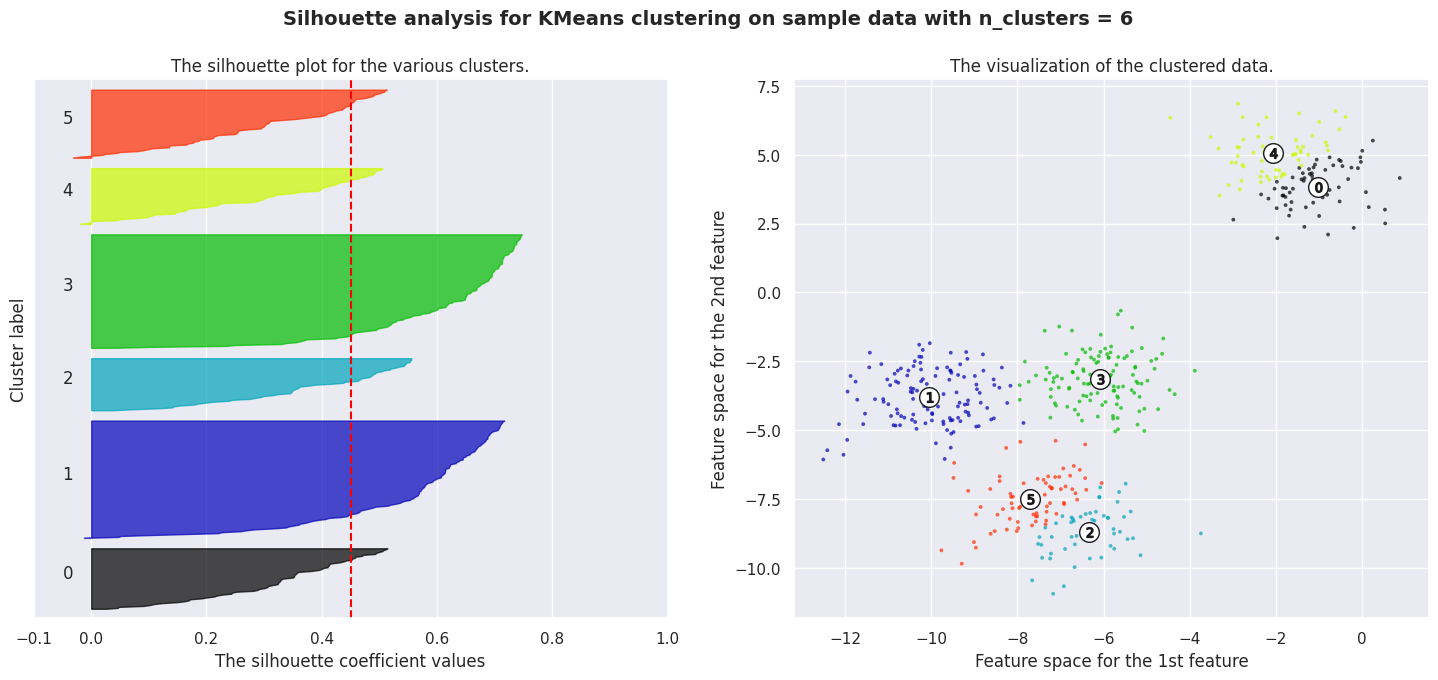

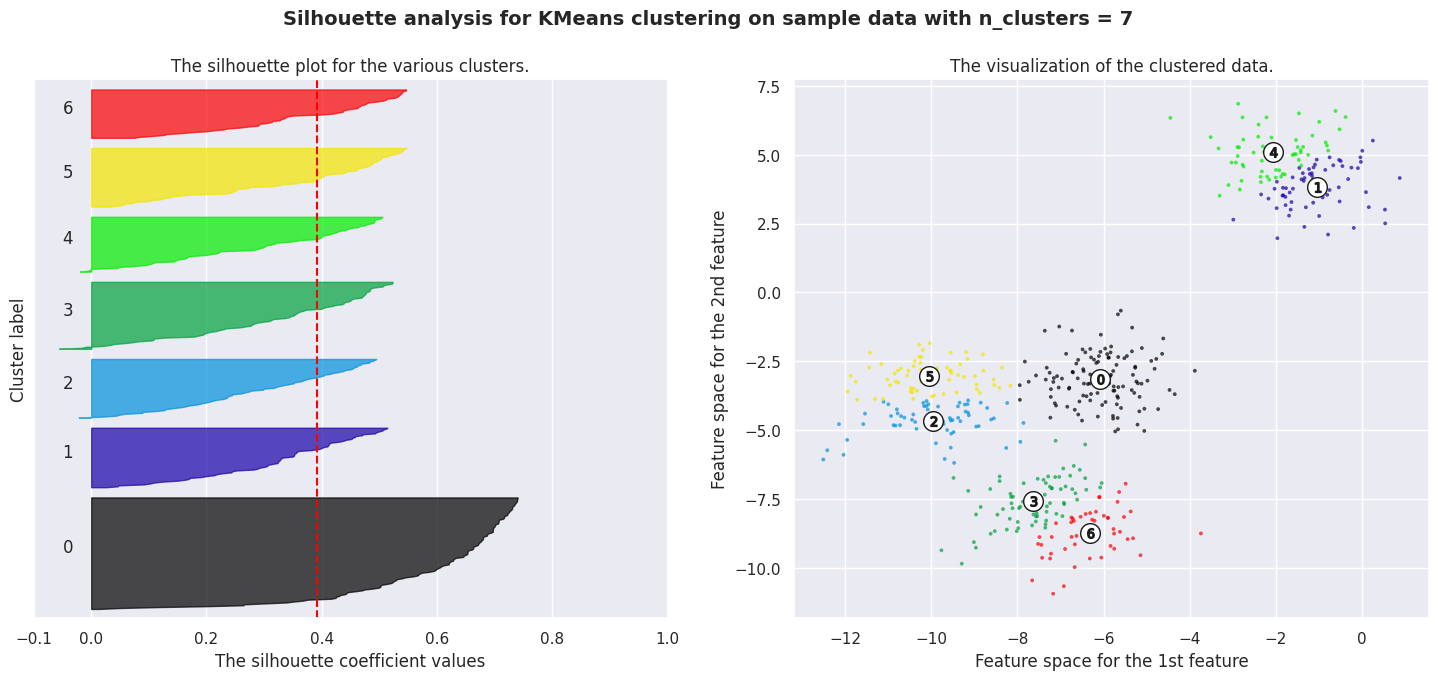

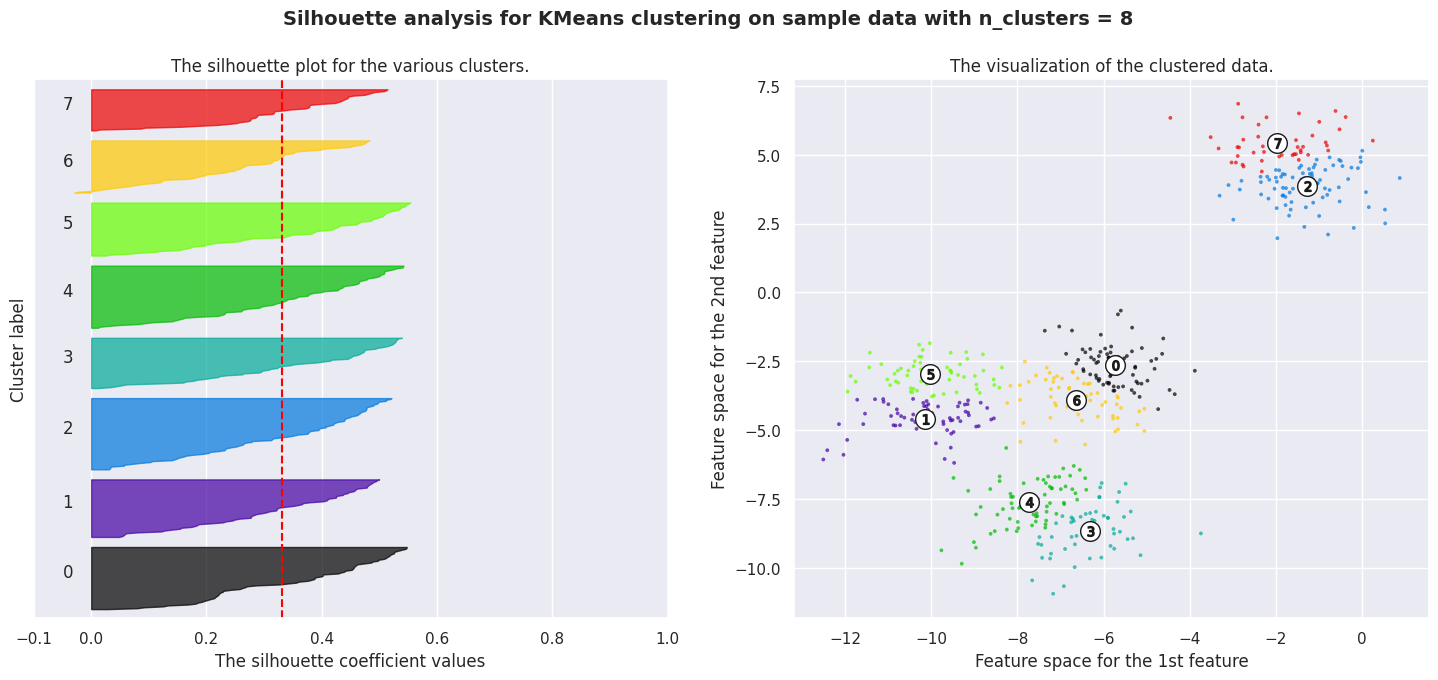

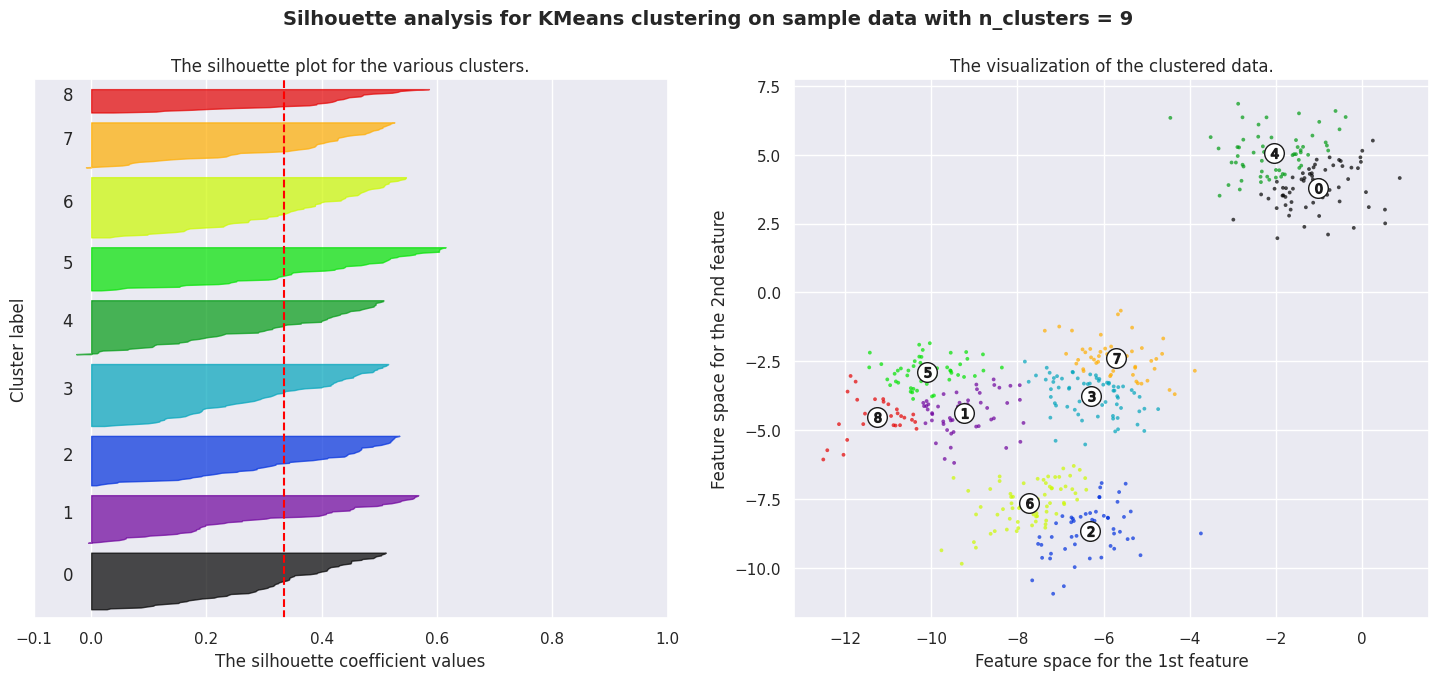

In [84]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
import numpy as np

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs
from sklearn.metrics import silhouette_samples, silhouette_score

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(
    n_samples=500,
    n_features=2,
    centers=4,
    cluster_std=1,
    center_box=(-10.0, 10.0),
    shuffle=True,
    random_state=1,
)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6, 7, 8, 9]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print(
        "For n_clusters =",
        n_clusters,
        "The average silhouette_score is :",
        silhouette_avg,
    )

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(
            np.arange(y_lower, y_upper),
            0,
            ith_cluster_silhouette_values,
            facecolor=color,
            edgecolor=color,
            alpha=0.7,
        )

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(
        X[:, 0], X[:, 1], marker=".", s=30, lw=0, alpha=0.7, c=colors, edgecolor="k"
    )

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(
        centers[:, 0],
        centers[:, 1],
        marker="o",
        c="white",
        alpha=1,
        s=200,
        edgecolor="k",
    )

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker="$%d$" % i, alpha=1, s=50, edgecolor="k")

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(
        "Silhouette analysis for KMeans clustering on sample data with n_clusters = %d"
        % n_clusters,
        fontsize=14,
fontweight="bold",
    )

plt.show()

Иерархия

In [61]:

X = df.iloc[:, :]
X

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster,pred_scipy,pred_sklearn
0,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90,2,2,1
1,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66,2,3,0
2,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74,2,1,1
3,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31,2,1,1
4,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53,2,1,1
5,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23,2,1,1
6,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87,2,1,0
7,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11,0,1,1
8,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80,0,3,0
9,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04,2,5,0


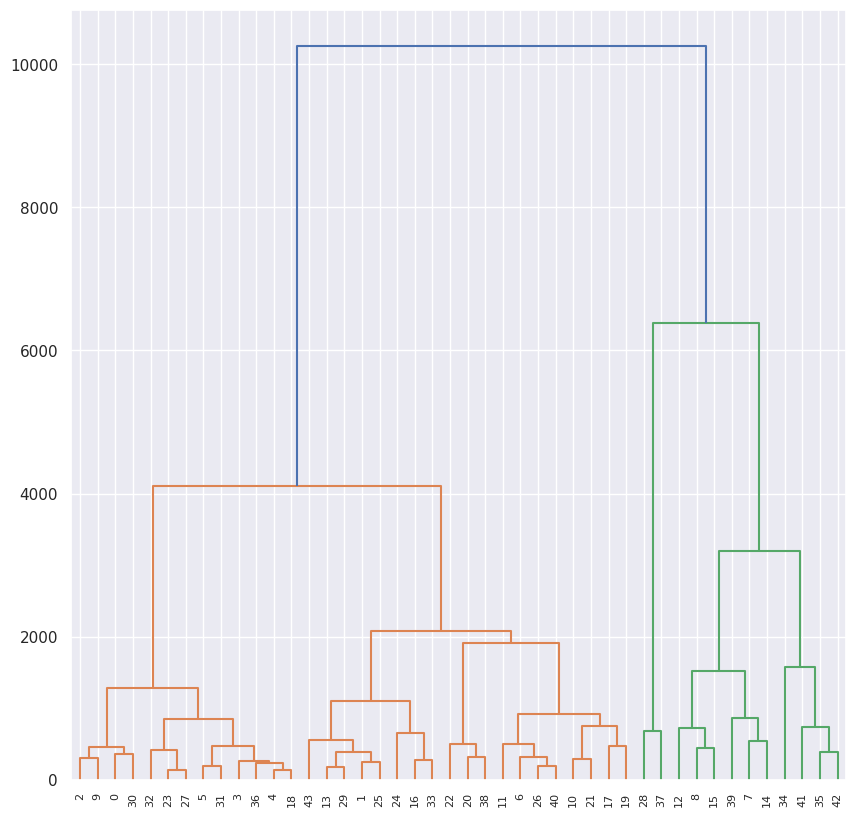

In [62]:



from scipy.cluster.hierarchy import dendrogram, linkage
from matplotlib import pyplot as plt

# матрица расстояний
Z = linkage(X, 'ward')

# визуализация дендрограмы
fig = plt.figure(figsize=(10, 10))
dn = dendrogram(Z)



In [74]:
from scipy.cluster.hierarchy import fcluster

# fcluster - метод разбиения на кластеры
# принимает на вход: матрицу расстояний
# критерий разделения на кластеры
label = fcluster(Z, 4000, criterion='distance')
# label = fcluster(Z, n_clusters=5, criterion='n_clusters')

np.unique(label)
# обратите внимание что в отличии kmeans или AgglomerativeClustering
# нумерация кластеров с 1

array([1, 2, 3, 4], dtype=int32)

In [75]:

df['pred_scipy'] = label
df

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster,pred_scipy,pred_sklearn
0,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90,2,1,0
1,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66,2,2,0
2,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74,2,1,0
3,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31,2,1,0
4,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53,2,1,0
5,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23,2,1,0
6,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87,2,2,0
7,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11,0,4,1
8,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80,0,4,1
9,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04,2,1,0


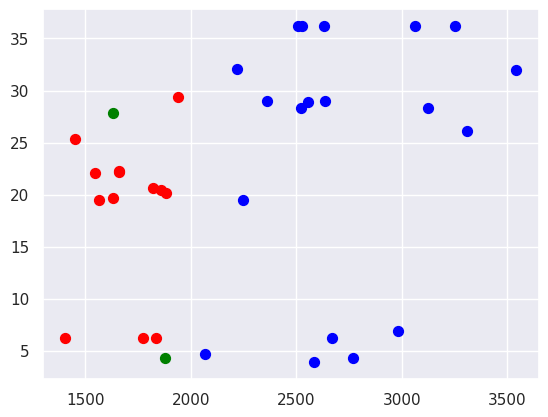

In [81]:
from matplotlib import pyplot as plt

plt.scatter(df.loc[label==1, 'Sunshine hours(City)'], df.loc[label==1, 'Obesity levels(Country)'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Sunshine hours(City)'], df.loc[label==2, 'Obesity levels(Country)'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Sunshine hours(City)'], df.loc[label==3, 'Obesity levels(Country)'], s=50, marker='o', color='green')

plt.show()

In [ ]:
from matplotlib import pyplot as plt

plt.scatter(df.loc[label==1, 'Annual avg. hours worked'], df.loc[label==1, 'Happiness levels(Country)'], s=50, marker='o', color='red')
plt.scatter(df.loc[label==2, 'Annual avg. hours worked'], df.loc[label==2, 'Happiness levels(Country)'], s=50, marker='o', color='blue')
plt.scatter(df.loc[label==3, 'Annual avg. hours worked'], df.loc[label==3, 'Happiness levels(Country)'], s=50, marker='o', color='green')

plt.show()

In [77]:
from sklearn.cluster import AgglomerativeClustering

# Создаем модель
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
# hc = AgglomerativeClustering(affinity = 'euclidean', linkage = 'ward', distance_threshold = 10)

y_hc = hc.fit_predict(X)
# hc.fit(X)
# hc.predict(X)

y_hc
# scipy - 1,2,3
# sklearn - 0,1,2

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_agglomerative.py:983: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 1, 1, 0, 2, 0, 1, 0, 1, 1, 0])

In [78]:
df['pred_sklearn'] = y_hc
df

,Rank,Sunshine hours(City),Cost of a bottle of water(City),Obesity levels(Country),Life expectancy(years) (Country),Pollution(Index score) (City),Annual avg. hours worked,Happiness levels(Country),Outdoor activities(City),Number of take out places(City),Cost of a monthly gym membership(City),cluster,pred_scipy,pred_sklearn
0,1,1858.000000,1.92,20.4,81.2,30.930000,1434.000000,7.44,422,1048,34.90,2,1,0
1,2,2636.000000,1.48,29.0,82.1,26.860000,1712.000000,7.22,406,1103,41.66,2,2,0
2,3,1884.000000,1.94,20.1,81.0,17.330000,1501.000000,7.29,132,1008,25.74,2,1,0
3,4,1821.000000,1.72,20.6,81.8,19.630000,1452.000000,7.35,129,598,37.31,2,1,0
4,5,1630.000000,2.19,19.7,79.8,21.240000,1380.000000,7.64,154,523,32.53,2,1,0
5,6,1662.000000,1.60,22.2,80.4,13.080000,1540.000000,7.80,113,309,35.23,2,1,0
6,7,2769.000000,0.78,4.3,83.2,51.122326,1644.000000,5.87,35,539,55.87,2,2,0
7,8,1626.000000,1.55,22.3,80.6,39.410000,1386.000000,7.07,254,1729,26.11,0,4,1
8,9,2591.000000,1.19,23.8,82.2,65.190000,1686.000000,6.40,585,2344,37.80,0,4,1
9,10,1938.000000,1.08,29.4,81.7,24.260000,1670.000000,7.23,218,788,31.04,2,1,0


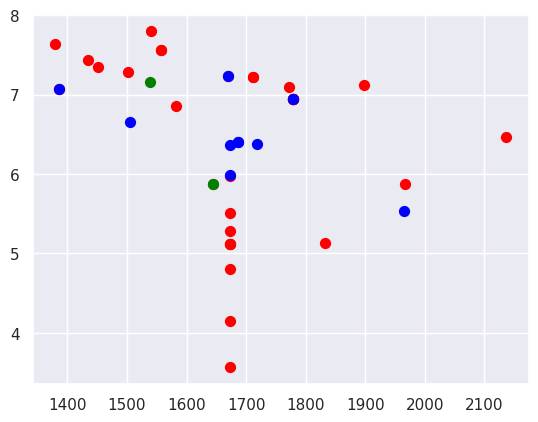

In [79]:
plt.scatter(X.loc[y_hc==0, 'Annual avg. hours worked'], X.loc[y_hc==0, 'Happiness levels(Country)'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Annual avg. hours worked'], X.loc[y_hc==1, 'Happiness levels(Country)'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Annual avg. hours worked'], X.loc[y_hc==2, 'Happiness levels(Country)'], s=50, marker='o', color='green')

plt.show()

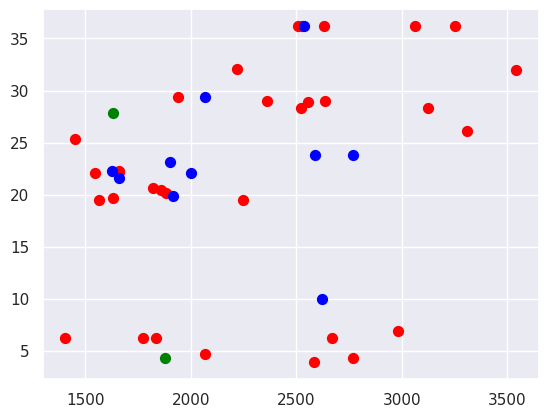

In [82]:
plt.scatter(X.loc[y_hc==0, 'Sunshine hours(City)'], X.loc[y_hc==0, 'Obesity levels(Country)'], s=50, marker='o', color='red')
plt.scatter(X.loc[y_hc==1, 'Sunshine hours(City)'], X.loc[y_hc==1, 'Obesity levels(Country)'], s=50, marker='o', color='blue')
plt.scatter(X.loc[y_hc==2, 'Sunshine hours(City)'], X.loc[y_hc==2, 'Obesity levels(Country)'], s=50, marker='o', color='green')

plt.show()